## Import libraries and select the directory

In [247]:
#import numpy and panda libraries
import numpy as np 
import pandas as pd 
import time
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [248]:
#import the model from sklearn
from sklearn import linear_model #algorithms and AI
#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split

In [249]:
# Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


## Read the files and show info

In [250]:
df=pd.read_csv('/Users/AFROARC/Documents/GitHub/BCNDATA1021/Projects/Messy_data/Kaggle_Data/alldata.csv')

In [251]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [252]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [253]:
df.shape

(6964, 5)

## Detect missing values

In [254]:
df['reviews'].isna()

0        True
1        True
2        True
3       False
4       False
        ...  
6959    False
6960    False
6961    False
6962    False
6963    False
Name: reviews, Length: 6964, dtype: bool

In [255]:
df=df.dropna()

In [256]:
df.reset_index(drop=True, inplace=True)

## Value counts from position

In [257]:
#count the number of occurrences in position column
df['position'].value_counts(ascending=False)

Data Scientist                                            204
Senior Data Scientist                                      53
Research Analyst                                           44
Data Engineer                                              39
Machine Learning Engineer                                  26
                                                         ... 
Postdoctoral Scientist (Molecular Mechanism of Cancer)      1
Technical Manager                                           1
Senior Business Analyst                                     1
Associate Technical Sales Representative                    1
Principal Data Scientist, Deep Learning                     1
Name: position, Length: 4221, dtype: int64

In [258]:
#count the number of occurrences in company column
df['company'].value_counts(ascending=False)

Amazon.com            357
Ball Aerospace        187
Microsoft             137
Google                134
NYU Langone Health     76
                     ... 
Eurofins VRL, Inc.      1
DCS Corp                1
iHeartMedia, Inc.       1
Neustar, Inc.           1
Nexient                 1
Name: company, Length: 1302, dtype: int64

## Standardize header names and lower case the whole text


In [259]:
df.head()

,position,company,description,reviews,location
0,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
1,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
2,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
3,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
4,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"


In [260]:
df.columns.to_list()

['position', 'company', 'description', 'reviews', 'location']

In [261]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [262]:
new_cols=[]
for col in df.columns:
    new_cols.append(standardize_col(col))
new_cols

['position', 'company', 'description', 'reviews', 'location']

In [263]:
standardize_col("position")

'position'

In [264]:
df.columns=new_cols
df.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [265]:
df = pd.concat([df[columns].astype(str).str.lower() 
           for columns in df.columns], axis=1)

In [266]:
df["position"].str.lower()

0                                            data analyst
1       assistant professor -tt - signal processing & ...
2                             manager of data engineering
3            product specialist - periscope, new ventures
4       junior to mid-level engineer, geologist or env...
                              ...                        
5321            data developer / machine learning analyst
5322                                          scientist i
5323                                     intern scientist
5324                      senior data & applied scientist
5325              principal data scientist, deep learning
Name: position, Length: 5326, dtype: object

## split the location by city and state 


In [267]:
# seperate city and state 
new = df["location"].str.split(", ", n = 1, expand = True) 
df["city"] = new[0]
df["state"] = new[1]

# get rid of Zip code
state = df["state"].str.split(" ", n = 1, expand = True) 
df["state"] = state[0]
df = df.drop(['location'],axis = 1)

df.head()

,position,company,description,reviews,city,state
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,atlanta,ga
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,atlanta,ga


<AxesSubplot:xlabel='state', ylabel='count'>

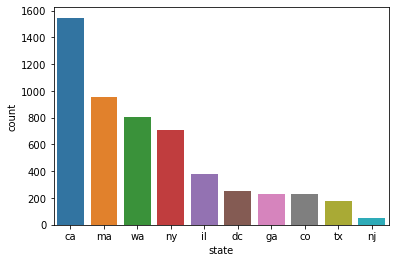

In [268]:
 sns.countplot(x="state", data=df,
                order = df['state'].value_counts().index)

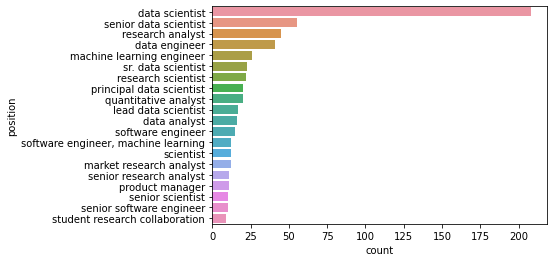

In [269]:
popular_position = df.groupby('position').size().sort_values(ascending =False).to_frame().reset_index()
popular_position.columns = ['position','count']
sns.barplot(x='count', y='position', data =popular_position.head(20));

In [271]:
# classify job into "machine learning" , "data scientist", "data analyst","data engineer", "other"

for i  in range(len(df)):
    
    
    p = df.iloc[i,0]
    p =str(p)
    p = p.lower()
    if p.find("machine")!= -1 and  p.find("learning")!= -1 :
         df.loc[i,'position_type'] = 'machine_learning'
        
    
      
    elif p.find("scientist") != -1 or p.find("science") != -1:
            df.loc[i,'position_type'] = 'data_scientist'
    elif p.find("analyst") != -1 or p.find("analytics") != -1 or p.find("intelligent") != -1or p.find("analysis") != -1 :
            df.loc[i,'position_type'] = 'analyst'
    elif p.find("engineer") != -1 :
            df.loc[i,'position_type'] = 'engineer'

    else:
        df.loc[i,'position_type'] = 'other'

<AxesSubplot:xlabel='position_type', ylabel='count'>

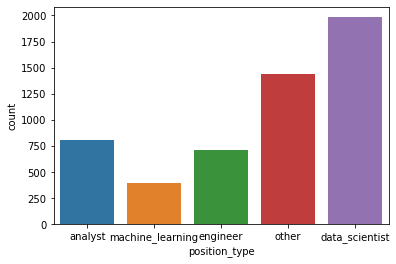

In [272]:
sns.countplot(x = 'position_type', data = df)

In [273]:
df

,position,company,description,reviews,city,state,position_type
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga,analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga,machine_learning
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga,engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,atlanta,ga,other
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,atlanta,ga,data_scientist
...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,sunnyvale,ca,machine_learning
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,sunnyvale,ca,data_scientist
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,sunnyvale,ca,data_scientist
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,sunnyvale,ca,data_scientist


## Create a new column based on if-else condition

- scien = Data Scienctist → 0
- analy  = Data Analyst → 1
- data eng = Data Engineer → 2
- machin = Machine learning engineer → 3
- archi = Data architect → 4

In [274]:
df.loc[df['position'].str.contains("data sci"),'roles'] = 'data_scientist'
df.loc[df['position'].str.contains("data analy"),'roles'] = 'data_analyst'
df.loc[df['position'].str.contains("data eng"),'roles'] = 'data_engineer'
df.loc[df['position'].str.contains("machine learn"),'roles'] = 'machine_learning_engineer'
df.loc[df['position'].str.contains("data arch"),'roles'] = 'data_architect'

In [275]:
df

,position,company,description,reviews,city,state,position_type,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga,analyst,data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga,machine_learning,machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga,engineer,data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,atlanta,ga,other,NaN
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,atlanta,ga,data_scientist,NaN
...,...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,sunnyvale,ca,machine_learning,machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,sunnyvale,ca,data_scientist,NaN
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,sunnyvale,ca,data_scientist,NaN
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,sunnyvale,ca,data_scientist,NaN


In [276]:
df = pd.concat([df[columns].astype(str).str.lower() 
           for columns in df.columns], axis=1)

In [277]:
df["roles"] = df["roles"].replace("nan","different_field")

In [278]:
df

,position,company,description,reviews,city,state,position_type,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga,analyst,data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga,machine_learning,machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga,engineer,data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,atlanta,ga,other,different_field
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,atlanta,ga,data_scientist,different_field
...,...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,sunnyvale,ca,machine_learning,machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,sunnyvale,ca,data_scientist,different_field
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,sunnyvale,ca,data_scientist,different_field
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,sunnyvale,ca,data_scientist,different_field


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   position       5326 non-null   object
 1   company        5326 non-null   object
 2   description    5326 non-null   object
 3   reviews        5326 non-null   object
 4   city           5326 non-null   object
 5   state          5326 non-null   object
 6   position_type  5326 non-null   object
 7   roles          5326 non-null   object
dtypes: object(8)
memory usage: 333.0+ KB


## Create different Var for DATA ANALYSTS SKILLS

In [280]:
#a dictionary? #a new table? # a column with 0 and 1? 

In [281]:
#create a new df
df_skills = df

In [282]:
df_skills

,position,company,description,reviews,city,state,position_type,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga,analyst,data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga,machine_learning,machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga,engineer,data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,atlanta,ga,other,different_field
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,atlanta,ga,data_scientist,different_field
...,...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,sunnyvale,ca,machine_learning,machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,sunnyvale,ca,data_scientist,different_field
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,sunnyvale,ca,data_scientist,different_field
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,sunnyvale,ca,data_scientist,different_field


Add programming languages columns

In [283]:
df_skills

,position,company,description,reviews,city,state,position_type,roles
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga,analyst,data_analyst
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga,machine_learning,machine_learning_engineer
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga,engineer,data_engineer
3,"product specialist - periscope, new ventures",mckinsey & company,qualifications\nbachelor’s degree\n5-7 years o...,385.0,atlanta,ga,other,different_field
4,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,atlanta,ga,data_scientist,different_field
...,...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,sunnyvale,ca,machine_learning,machine_learning_engineer
5322,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,sunnyvale,ca,data_scientist,different_field
5323,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,sunnyvale,ca,data_scientist,different_field
5324,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,sunnyvale,ca,data_scientist,different_field


In [284]:
df_skills["python"] = df_skills["description"].str.contains("python")
df_skills["r"] = df_skills["description"].str.contains("r")
df_skills["sas"] = df_skills["description"].str.contains("sas")
df_skills["oracle"] = df_skills["description"].str.contains("oracle")
df_skills["java"] = df_skills["description"].str.contains("java")

In [285]:
df_skills["sql"] = df_skills["description"].str.contains("sql")
df_skills["dataviz"] = df_skills["description"].str.contains("data visualization")
df_skills["statistics"] = df_skills["description"].str.contains("statistics")
df_skills["excel"] = df_skills["description"].str.contains("excel")
df_skills["business_intelligence"] = df_skills["description"].str.contains("business intelligence")
df_skills["communication"] = df_skills["description"].str.contains("communication")
df_skills["machine_learning"] = df_skills["description"].str.contains("machine learning")
df_skills["teamwork"] = df_skills["description"].str.contains("teamwork")

## Filter data and store it in new vars 

In [287]:
da_filtered = df[df['roles'].eq('data_analyst')]
da_filtered

,position,company,description,reviews,city,state,position_type,roles,python,r,...,java,sql,dataviz,statistics,excel,business_intelligence,communication,machine_learning,teamwork,1yr
0,data analyst,operation hope,department: program operationsposition locatio...,44.0,atlanta,ga,analyst,data_analyst,True,True,...,False,True,True,False,False,False,False,False,False,True
26,scientist - data analysis,american cancer society,position description:\nsave lives. fulfill you...,959.0,atlanta,ga,data_scientist,data_analyst,False,True,...,False,False,False,False,False,False,True,False,True,False
39,flight safety data analysis fall co-op,delta air lines,responsibilities include duties to support fli...,2963.0,atlanta,ga,analyst,data_analyst,True,True,...,False,True,False,True,False,False,True,True,False,False
61,data analyst supply chain,the home depot,position purpose:\na data analyst supply chain...,38844.0,atlanta,ga,analyst,data_analyst,False,True,...,False,True,False,True,False,False,True,True,False,True
212,sr data analyst supply chain,the home depot,position purpose:\na sr data analyst supply ch...,38844.0,atlanta,ga,analyst,data_analyst,True,True,...,True,True,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,big data analyst,autodesk,big data analyst\n\n18wd28972\namericas-united...,315.0,san francisco,ca,analyst,data_analyst,False,True,...,False,True,False,False,True,False,False,False,False,False
5069,research data analyst,jll,at jll we are always looking for great talent ...,1786.0,san francisco,ca,analyst,data_analyst,False,True,...,False,False,True,False,True,True,True,False,False,False
5094,healthcare data analyst,medal,welcome to medal! we’re making it easy to shar...,4.0,san francisco,ca,analyst,data_analyst,False,True,...,False,True,False,False,True,False,False,False,False,False
5115,"data analyst, s&p - jump",uber,about uber\n\nwe’re changing the way people th...,496.0,san francisco,ca,analyst,data_analyst,True,True,...,False,True,False,False,False,False,False,False,False,False


In [288]:
df['python'].value_counts(ascending=False)

False    3235
True     2091
Name: python, dtype: int64

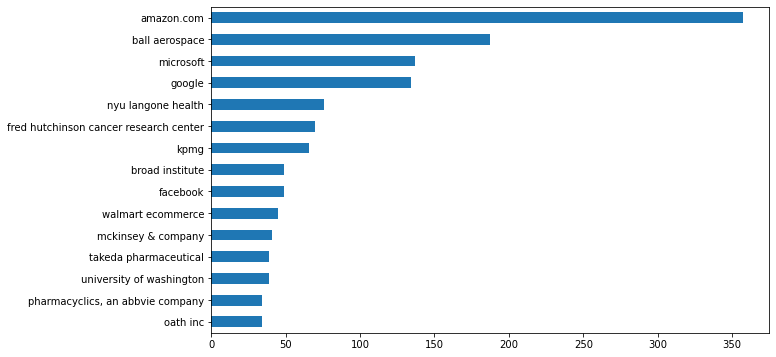

In [289]:
df['company'].value_counts().head(15).sort_values().plot.barh(figsize = (10,6));

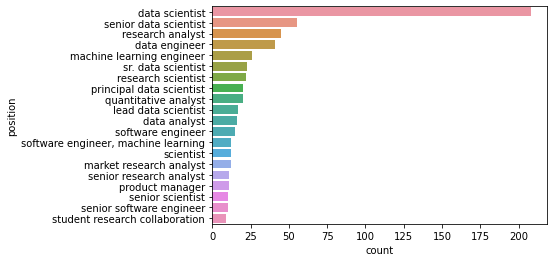

In [290]:
popular_position = df.groupby('position').size().sort_values(ascending =False).to_frame().reset_index()
popular_position.columns = ['position','count']
sns.barplot(x='count', y='position', data =popular_position.head(20));

Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

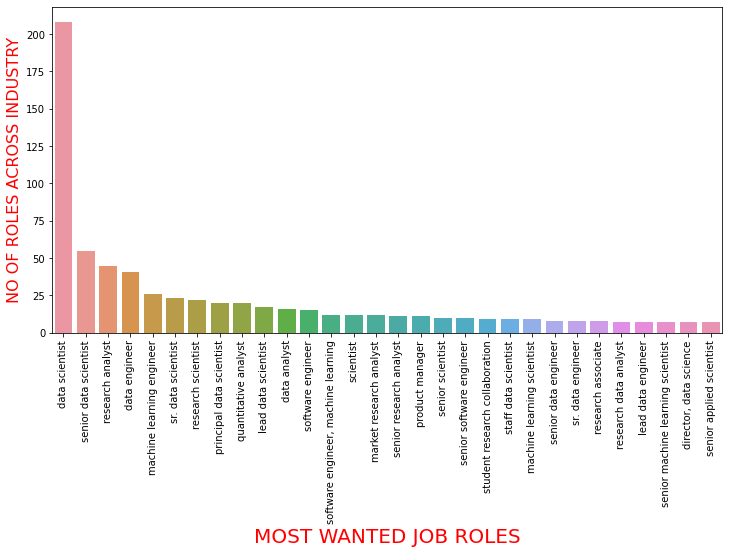

In [291]:
# Finding total number of unique roles in data science domain from the given dataset
total_no_roles=df['position'].nunique();

# most offered roles across all the firms
most_offd_roles=df.groupby(['position'])['company'].count();
most_offd_roles=most_offd_roles.reset_index(name='company');
most_offd_roles=most_offd_roles.sort_values(['company'],ascending=False);
most_offd_roles=most_offd_roles.head(30);

# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(12,6));
ax=seaborn.barplot(x="position", y="company", data=most_offd_roles);
ax.set_xticklabels(most_offd_roles['position'],rotation=90);
ax.set_xlabel('MOST WANTED JOB ROLES',fontsize=20,color='red');
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY',fontsize=16,color='red')

In [292]:
ds_filtered = df[df['roles'].eq('data_scientist')]
ds_filtered

,position,company,description,reviews,city,state,position_type,roles,python,r,...,java,sql,dataviz,statistics,excel,business_intelligence,communication,machine_learning,teamwork,1yr
6,senior associate - cognitive data scientist na...,kpmg,known for being a great place to work and buil...,4494.0,atlanta,ga,data_scientist,data_scientist,False,True,...,False,False,False,True,True,False,True,True,False,False
9,"senior associate, data scientist",kpmg,innovate. collaborate. shine. lighthouse — kpm...,4494.0,atlanta,ga,data_scientist,data_scientist,False,True,...,False,False,True,True,True,False,False,True,False,False
11,business intelligence data science analyst - s...,newell brands,data science analyst– business intelligence\nl...,912.0,atlanta,ga,data_scientist,data_scientist,True,True,...,False,True,True,True,False,True,True,False,False,False
12,data scientist,cotiviti,cotiviti is looking for an industry leading da...,104.0,atlanta,ga,data_scientist,data_scientist,True,True,...,False,True,False,True,False,False,False,True,False,False
17,data scientist,norfolk southern corp,join a growing data science and advanced analy...,722.0,atlanta,ga,data_scientist,data_scientist,True,True,...,False,True,False,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,systems software performance data scientist su...,alibaba,we are the system performance team of alibaba ...,15.0,sunnyvale,ca,data_scientist,data_scientist,True,True,...,False,True,False,True,True,False,True,True,False,False
5314,lead data scientist - nlp,target,description:\n\nabout this opportunity\njoin t...,33275.0,sunnyvale,ca,data_scientist,data_scientist,False,True,...,False,False,False,True,True,False,True,True,False,False
5319,lead data scientist - haskell,target,description:\ntarget is looking for engineers ...,33275.0,sunnyvale,ca,data_scientist,data_scientist,False,True,...,False,False,False,True,False,False,False,True,False,False
5320,senior data scientist (gec11902),walmart,position description\nproficient in java or py...,148114.0,sunnyvale,ca,data_scientist,data_scientist,True,True,...,True,False,False,True,False,False,False,True,False,False


In [293]:
de_filtered = df[df['roles'].eq('data_engineer')]
de_filtered

,position,company,description,reviews,city,state,position_type,roles,python,r,...,java,sql,dataviz,statistics,excel,business_intelligence,communication,machine_learning,teamwork,1yr
2,manager of data engineering,mckinsey & company,qualifications\nbachelor’s degree in computer ...,385.0,atlanta,ga,engineer,data_engineer,False,True,...,False,True,False,False,False,False,False,False,False,False
49,data engineer,gallup,help gallup fulfill our mission of providing a...,140.0,atlanta,ga,engineer,data_engineer,True,True,...,True,False,False,True,False,False,False,True,False,False
65,"data engineer - gc insights, new ventures",mckinsey & company,qualifications\nstrong academic qualifications...,385.0,atlanta,ga,engineer,data_engineer,False,True,...,False,True,False,False,False,True,True,False,False,False
73,"data engineer, scala",captech consulting,job description\n\nthe data engineer role fall...,14.0,atlanta,ga,engineer,data_engineer,True,True,...,True,True,False,True,False,True,False,False,False,False
86,enterprise data analyst & data engineer,novelis,role overview\n\nnovelis is embarking on the j...,189.0,atlanta,ga,analyst,data_engineer,True,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,staff data engineer,walmart ecommerce,position description\nwe are part of search en...,141.0,sunnyvale,ca,engineer,data_engineer,True,True,...,True,True,False,False,False,False,True,False,False,False
5164,principal data engineer,target,description:\njoin the data science &amp; engi...,33275.0,sunnyvale,ca,engineer,data_engineer,False,True,...,False,False,False,False,False,False,False,False,False,False
5170,lead data engineer,target,description:\ndata science and engineering tea...,33275.0,sunnyvale,ca,engineer,data_engineer,True,True,...,True,False,False,False,False,False,False,False,False,False
5214,lead data engineer - devops sunnyvale,target,description:\njoin us as a lead data engineer ...,33275.0,sunnyvale,ca,engineer,data_engineer,True,True,...,False,True,False,False,False,False,False,False,False,False


In [294]:
ml_filtered = df[df['roles'].eq('machine_learning_engineer')]
ml_filtered

,position,company,description,reviews,city,state,position_type,roles,python,r,...,java,sql,dataviz,statistics,excel,business_intelligence,communication,machine_learning,teamwork,1yr
1,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,atlanta,ga,machine_learning,machine_learning_engineer,False,True,...,False,False,False,False,False,False,False,True,False,False
51,machine learning / artificial intelligence res...,symantec,(this is an individual contributor role)\n\nco...,950.0,atlanta,ga,machine_learning,machine_learning_engineer,True,True,...,False,False,False,False,False,False,True,True,False,False
66,"technical evangelist – database, analytics, an...",amazon.com,job description\ndo you love data? do you like...,25907.0,atlanta,ga,machine_learning,machine_learning_engineer,False,True,...,False,False,False,False,True,False,True,True,False,False
116,tech fall 2018 intern - machine learning,turner,the turner story\n\nturner is a division of ti...,375.0,atlanta,ga,machine_learning,machine_learning_engineer,True,True,...,False,False,False,True,False,False,False,True,False,False
117,r&d innovation engineer - video analytics/mach...,honeywell,"join a team recognized for leadership, innovat...",6121.0,atlanta,ga,machine_learning,machine_learning_engineer,True,True,...,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,"machine learning specialist, trust and safety",google,google's brand is only as strong as our users'...,2474.0,sunnyvale,ca,machine_learning,machine_learning_engineer,False,True,...,False,False,False,False,False,False,True,True,False,False
5310,applied machine learning scientist,amazon.com,job description\nexternal job description\nama...,25907.0,sunnyvale,ca,machine_learning,machine_learning_engineer,True,True,...,False,True,False,True,False,False,True,True,False,False
5315,"machine learning scientist, amazon alexa",amazon.com,job description\namazon is looking for a passi...,25907.0,sunnyvale,ca,machine_learning,machine_learning_engineer,True,True,...,True,False,False,False,False,False,True,True,False,False
5318,"manager, machine learning",amazon.com,job description\nalexa is amazon's new cloud-b...,25907.0,sunnyvale,ca,machine_learning,machine_learning_engineer,False,True,...,False,False,False,False,True,False,True,True,False,False


In [295]:
darch_filtered = df[df['roles'].eq('data_architect')]
darch_filtered

,position,company,description,reviews,city,state,position_type,roles,python,r,...,java,sql,dataviz,statistics,excel,business_intelligence,communication,machine_learning,teamwork,1yr
972,manager data architects and database systems g...,massmutual,"since 1851, massmutual’s commitment has always...",786.0,boston,ma,other,data_architect,True,True,...,False,True,False,False,False,False,True,True,False,False
2563,"data architect technical lead, ames",the aerospace corporation,"requisition id: 41481\nall locations: houston,...",82.0,mountain view,ca,other,data_architect,False,True,...,False,True,False,False,False,False,True,False,False,False
2924,head of enterprise data architecture,marsh & mclennan companies,location: flexible; new york city preferred\n\...,537.0,new york,ny,other,data_architect,False,True,...,False,False,False,False,False,False,False,False,False,False
2941,data architect,businesses united technologies corp. headquarters,united technologies corporation (utc) has a de...,831.0,new york,ny,other,data_architect,True,True,...,False,False,False,True,True,False,True,True,False,False
3121,data architect,movable ink,movable ink powers meaningful experiences in e...,4.0,new york,ny,other,data_architect,False,True,...,False,False,False,False,False,False,False,False,False,False
3426,senior data architect,microsoft,are you passionate about delivering the best u...,4618.0,redmond,wa,other,data_architect,True,True,...,True,True,False,True,True,False,True,True,False,False
4604,senior data architect,taulia,about taulia:\ntaulia delivers working capital...,3.0,san francisco,ca,other,data_architect,True,True,...,True,False,False,False,True,False,True,True,False,False
5022,data architect,metromile,about us\n\nmetromile is a start-up that is di...,7.0,san francisco,ca,other,data_architect,True,True,...,True,False,False,False,False,False,False,False,False,False
5204,chief data architect (disrupting a multi-billi...,jobspring partners,an autonomous subsidiary of one of the world’s...,27.0,sunnyvale,ca,other,data_architect,True,True,...,False,False,False,False,True,False,True,True,False,False


### save to csv


In [299]:
df.drop(['description'], axis = 1, inplace = True) 


In [300]:
df


,position,company,reviews,city,state,position_type,roles,python,r,sas,...,java,sql,dataviz,statistics,excel,business_intelligence,communication,machine_learning,teamwork,1yr
0,data analyst,operation hope,44.0,atlanta,ga,analyst,data_analyst,True,True,True,...,False,True,True,False,False,False,False,False,False,True
1,assistant professor -tt - signal processing & ...,emory university,550.0,atlanta,ga,machine_learning,machine_learning_engineer,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,manager of data engineering,mckinsey & company,385.0,atlanta,ga,engineer,data_engineer,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,"product specialist - periscope, new ventures",mckinsey & company,385.0,atlanta,ga,other,different_field,False,True,False,...,False,False,False,False,True,True,True,False,False,False
4,"junior to mid-level engineer, geologist or env...",wood,899.0,atlanta,ga,data_scientist,different_field,False,True,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,data developer / machine learning analyst,netapp,574.0,sunnyvale,ca,machine_learning,machine_learning_engineer,True,True,False,...,True,True,False,False,True,True,True,True,True,False
5322,scientist i,"pharmacyclics, an abbvie company",26.0,sunnyvale,ca,data_scientist,different_field,False,True,False,...,False,False,False,False,True,False,True,False,False,False
5323,intern scientist,oath inc,5.0,sunnyvale,ca,data_scientist,different_field,True,True,False,...,True,True,False,True,False,False,False,True,False,False
5324,senior data & applied scientist,microsoft,4618.0,sunnyvale,ca,data_scientist,different_field,False,True,False,...,True,False,False,False,False,False,True,True,False,False


In [302]:
df.to_csv(r'/Users/AFROARC/Documents/GitHub/BCNDATA1021/Projects/Messy_data/Kaggle_Data/test.csv')